In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")

In [6]:
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [8]:
data=data.drop(["Unnamed: 0"], axis=1)

In [9]:
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Univariate Analysis

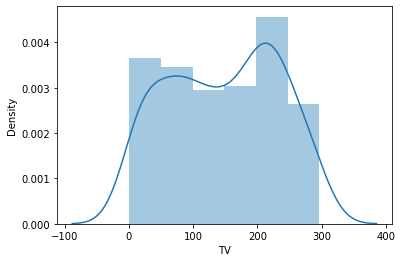

In [5]:
#As per the above results it is clear that there are 3 features- TV, Newspaper and radio and one target- Sales
#We can observe that the features and target are of continuous in nature
#There seems to be no null values in the data
#Univariate Analysis

sns.distplot(data["TV"])
plt.show()

#From the below graphs of univariate analysis of features, it is evident that the data is skewed. The data of TV distribution is peaked at 210 approximately.

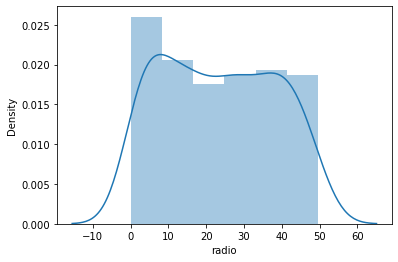

In [6]:
sns.distplot(data["radio"])
plt.show()
#From the below graph of Radio distribution, it is peaked at approximately 8 and it is skewed.

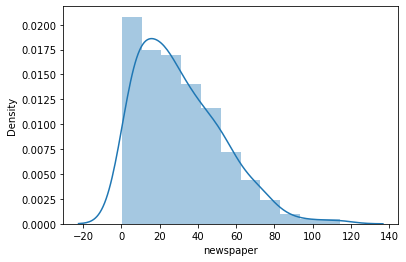

In [7]:
sns.distplot(data["newspaper"])
plt.show()
#We can observe from the below graph that the newspaper distribution has a negative distribution initially and it is peaked at 18.

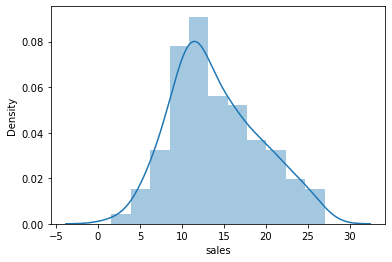

In [12]:
sns.distplot(data["sales"])
plt.show()
#The target distribution has a peak at 12 and has initially negative value from -5 to 0.

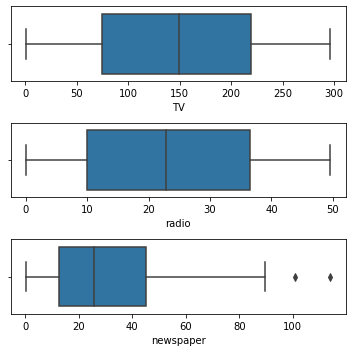

In [10]:
#Checking Outliers
fig,ax=plt.subplots(3,figsize=(5,5))
plt1=sns.boxplot(data["TV"],ax=ax[0])
plt2=sns.boxplot(data["radio"],ax=ax[1])
plt1=sns.boxplot(data["newspaper"],ax=ax[2])
plt.tight_layout()

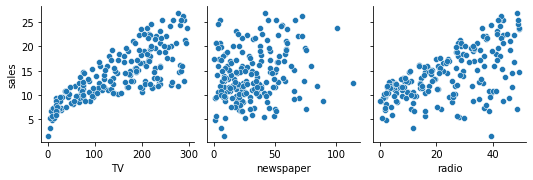

In [8]:
#Bivariate Analysis
sns.pairplot(data,x_vars=["TV","newspaper","radio"],y_vars="sales",kind="scatter")
#We can infer from the graph below that TV has a positive impact on Sales
#From the below graph it is clear that Radio also has a positive relation on Sales.
#From the below relation of Newspaper and Sales,it is positive but very skewed and
#the positive relation is less compared to the relation of Radio and TV

In [12]:
data.corr()["sales"].sort_values(ascending=True)

newspaper    0.228299
radio        0.576223
TV           0.782224
sales        1.000000
Name: sales, dtype: float64

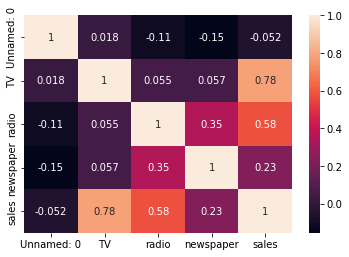

In [9]:
sns.heatmap(data.corr(),annot = True)
plt.show()

In [9]:
#Splitting features and target
X=data[["TV","radio","newspaper"]]
Y=data[["sales"]]

In [10]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_scale=scale.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scale,Y,test_size=0.33)

# Linear Regression Model

In [12]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [13]:
model1=lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.9002657960122639

In [14]:
y_pred=lr.predict(x_test)

In [15]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8829081852449516

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(model1,x_train,y_train,cv=cv)
score1=cv1.mean()
score1

0.8846822186634109

# Random Forest Regressor

In [17]:
from sklearn.ensemble import RandomForestRegressor

model2= RandomForestRegressor(n_estimators=6)
model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)


In [19]:
r2_score(y_test,y_pred)

0.9560156012717308

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(model2,x_train,y_train,cv=cv)
score1=cv1.mean()
score1

0.9424126001605364

# Decision Tree Regressor

In [21]:
from sklearn.tree import DecisionTreeRegressor
# create an estimator, optionally specifying parameters
model3= DecisionTreeRegressor()
# fit the estimator to the data
model3.fit(x_train,y_train)
# apply the model to the test and training data
pred_y_test = model3.predict(x_test)
pred_y_train = model3.predict(x_train)


In [22]:
r2_score(y_test,pred_y_test)

0.9435705986106815

In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(model3,x_train,y_train,cv=cv)
score1=cv1.mean()
score1

0.906116697983926

# KNN

In [24]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
model4=knn.fit(x_train,y_train)

In [25]:
pred_y=model4.predict(x_test)
r2_score(y_test,pred_y)

0.9119869059660445

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(model4,x_train,y_train,cv=cv)
score1=cv1.mean()
score1

0.9100418740921702

# SVR

In [27]:
from sklearn.svm import SVR
model5=SVR(kernel = 'rbf')
model5.fit(x_train,y_train)

SVR()

In [28]:
y_pred=model5.predict(x_test)

In [29]:
r2_score(y_test,y_pred)

0.8699127300868857

In [30]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(model5,x_train,y_train,cv=cv)
score1=cv1.mean()
score1

0.8860526049948974

In [ ]:
#From the above R2 Score and CV score, the best model is KNN model- mmodel4

# Hyperparameter Tuning Using Grid Search Cross-Validation

In [31]:
knn=KNeighborsRegressor(n_neighbors=5)

In [32]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [33]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
param_dist = {"algorithm":['auto','brute','kd_tree','ball_tree'],"leaf_size": [30,40,50,60],'n_neighbors': [5,6,7]}

In [47]:
samples = 8  # number of random samples 
ksearch=RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=samples,cv=3)

In [48]:
final=ksearch.fit(x_train,y_train)
print(final.best_params_)

{'n_neighbors': 5, 'leaf_size': 30, 'algorithm': 'auto'}


In [49]:
import pickle
pickle.dump(final, open('sale.pkl', 'wb'))

In [50]:
pickled_model = pickle.load(open('sale.pkl', 'rb'))
pickled_model.predict(x_test)

array([[22.94],
       [16.08],
       [19.7 ],
       [ 8.84],
       [18.82],
       [13.22],
       [13.46],
       [16.58],
       [10.48],
       [18.42],
       [20.74],
       [10.74],
       [ 7.1 ],
       [17.64],
       [14.02],
       [13.4 ],
       [ 8.34],
       [ 7.8 ],
       [16.24],
       [10.5 ],
       [12.54],
       [11.28],
       [ 8.04],
       [15.34],
       [16.96],
       [19.4 ],
       [10.5 ],
       [10.34],
       [ 7.76],
       [21.78],
       [11.9 ],
       [15.26],
       [13.64],
       [ 7.18],
       [20.38],
       [ 9.72],
       [22.4 ],
       [ 8.54],
       [20.2 ],
       [10.7 ],
       [18.54],
       [10.42],
       [16.42],
       [ 8.48],
       [16.42],
       [11.54],
       [18.48],
       [ 9.5 ],
       [ 9.92],
       [12.7 ],
       [14.76],
       [11.64],
       [13.  ],
       [13.46],
       [12.3 ],
       [15.68],
       [10.9 ],
       [16.26],
       [20.32],
       [14.3 ],
       [12.96],
       [21.88],
       [